# "Applications of SVD: Image Processing"

<img src="fastcore_imgs/ds3.jpg" />

Matrix decomposition is an important part of matrix theory. By splitting the original matrix into the product of matrices with different characteristics, it can not only reveal its potential properties, but also help realize various efficient algorithms. Singular value decomposition (SVD) is a robust and stable method to split the matrix into orthogonal matrices and a generalized diagonal matrix, which also have their own geometric meaning. Nowadays, SVD plays an important role in dimension reduction, recommender system, signal processing and other fields. In this article, we will use SVD with some images to explore its applications in image processing: image denoising, image compression and image reconstruction.

## The geometric meaning of SVD

Based on the definition of SVD, suppose A is a $m \times n$ matrix, we can get a decomposition of the form:
$$A = U \Sigma V'$$
where $U$ is an $m \times m$ orthogonal matrix, $\Sigma$ is a rectangular $m\times n$ diagonal matrix, $V'$ is an $n \times n$ orthogonal matrix$^{[1]}$. We can also express the formula like this:
$$
A=\left[u_{1}, u_{2}, \ldots, u_{m}\right]\left[\begin{array}{cc}
D & 0 \\
0 & 0
\end{array}\right]\left[\begin{array}{c}
v_{1}' \\
v_{2}' \\
\vdots \\
v_{n}'
\end{array}\right]
$$
where $$
D=\left[\begin{array}{cccc}
\sigma_{1} & 0 & \cdots & 0 \\
0 & \sigma_{2} & \vdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_{r}
\end{array}\right]
$$ and $r$ is the rank of the matrix $A$.
Expand the matrix, we have $$
A=\sigma_{1} u_{1} v_{1}'+\sigma_{2} u_{2} v_{2}'+\cdots+\sigma_{r} u_{r} v_{r}'
$$


The matrix $U$, $\Sigma$ and $V'$ obtained after SVD have their own mathematical meaning.
- $V$ represents the orthonormal basis of the original domain
- $U$ represents the new orthonormal basis after A transformation
- $\Sigma$ indicates the stretch relationship between the vector of $V$ and the corresponding vector of $U$, and each $\sigma_i$ in the $\Sigma$ will be sorted from largest to smallest. The larger the value, the higher the importance of the dimension.

<img src="fastcore_imgs/svd1.png" />

Here the matrix $U$ and $V$ are orthogonal matrices, and the column vectors of $U$, $u_1,u_2,\dots,u_m$ represent a set of orthonormal basis of $R^m$ space. Similarly, the column vectors of $V$, $v_1,v_2,\dots, v_n$ also represent a set of orthonormal basis of $K^n$. Then the matrix $A$ shows a linear mapping from $K^n$ to $K^m$, $f: x \rightarrow Ax$. Based on the orthonormal basis above, we have $f(v_i) = \sigma_i u_i, i = 1, \dots, \min(m,n)$, where $\sigma_i$ is the $i$th diagonal entry of $\Sigma$. If $i > \min(m,n)$, $f(v_i) = 0$.

In this way, by using SVD to a matrix, we get a linear mapping $f: K^n \rightarrow K^m$, and a set of orthonormal basis in the original space and image space respectively. $f$ maps the $i$th basis vector of $K^n$ to a non-negative multiple of the $i$th basis vector of $K^m$ and maps the remaining basis vectors in $K^n$ to zero vectors. In other words, the matrix of the linear transformation $f$ on the two selected bases is expressed as a diagonal matrix with all non-negative diagonal elements.

## What is image processing?

Digital image can be regarded as a two-dimensional matrix whose element value is the gray value of the corresponding pixel. With the continuous improvement of the resolution of various imaging devices, the volume of image data has steadily increased. The large amount of image information will put great pressure on the storage capacity of the memory, the bandwidth of the communication channel and the processing speed of the computer. In order to solve this problem, image processing becomes more important and common. In general, image processing is a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it. As a type of signal processing, image processing is a rapidly growing technology, which takes an image as input, and returns an image or features associated with that image as output $^{[2]}$.

Since there are a large number of close color areas in the image, the correlation between pixels is strong. It is conceivable that the data matrix has a certain degree of redundancy. Such redundancy can be measured by the rank of the matrix: the higher the rank of the image matrix, the lower the correlation between the columns; in contrast, the columns of the image matrix with lower rank are more dependent on each other. In this way, we need to consider how to obtain a low-rank optimal approximation of an image matrix. Fortunately, SVD provides a solution to this problem. Now we will talk about the applications of SVD in the three following aspects.

### Image denoising

Image noise is random variation of brightness or color information in images, and is usually an aspect of electronic noise, which is an undesirable by-product of image capture that obscures the desired information$^{[3]}$. And the goal of image denoising is to remove noise from a noisy image, so as to restore the true image.

As mentioned above, each $\sigma_i$ in the matrix $\Sigma$ shows the importance of the corresponding dimension. Since an image matrix may have a certain degree of redundancy, there is some less important concepts in an image matrix. What if we change their corresponding values of $\sigma_i$ to zero which are very tiny? Based on that, we could apply SVD to image denoising.

Let's see this example. The grid image below is a noisy image, where we can see many tiny points. Here we choose the threshold as 10. If the singular values of this image matrix is below 10, then they will be replaced with 0.

<img src="fastcore_imgs/grid.gif" width="300" />

In [7]:
using ImageView, Images

img = load("grid.gif")
imshow(Gray.(img))
save("gray_grid.gif", Gray.(img))
U, S, V = svd(Gray.(img))
S_new = [s < 10 ? 0 : s for s in S]
X = U * diagm(S_new) * V'
denoise_img = imshow(X)
save("denoise_grid.gif", map(clamp01nan, X))

<img src="fastcore_imgs/gray_grid.gif" width="300" /> <img src="fastcore_imgs/denoise_grid.gif" width="300" />

The left image is the grayscale image of the original one, and the right image is the resulting one after denoising. We can see the resulting image is smoother and cleaner than the left image, and the tiny points are removed. In this way, singular value decomposition does help to reduce the noise of images under certain criteria.

### Image Compression

Image compression is a type of data compression to reduce the amount of data required to represent a digital image. As mentioned above, there is some redundancy in an image matrix, which can be measured by the rank of the matrix. If we write the image matrix as $A = \sum_{i=1}^{r} \sigma_i u_i v_i'$, we can see 
SVD only leaves the product of $u_i$ and $v_i$ corresponding to the first non-zero $r$ singular values, and the remaining product is actually redundant data. In this way, we can apply SVD on any image and discard the zero singular values and their corresponding vectors. 

However, due to the influence of noise and the complexity of the images, in the real world, image matrices are often full rank, then the above method is not applicable. Although the row vectors or column vectors in the image matrix are strictly independent, we can regard them as approximately related. Based on the property of singular value decomposition, the singular values of a matrix decrease quickly as the rank increases. Therefore, such image matrices will have lots of small singular values. In this way, we can keep the first $k$ singular values of the matrix and their corresponding vectors, and discard the small singular values. The retained data represent the most important and representative information in the original image. This is the basic rule of image compression.

For a grayscale image which is $m \times n$ pixels in dimension, we have to get $mn$ pixel values, if we want to store that image. If we only hold the first $k$ singular values, we will store $k(m+n+1)$ pixel values (where $mk$ is the first $k$ column vectors of $U$, $k$ is the first $k$ singular values, and $kn$ is the first $k$ row vectors of $V'$), and $k(m+n+1) \ll mn$. With this, we are able to use a few singular values to represent the image with little differences from the original one.

In addition, the color image in our computers is a mixture of the color red, blue and green displayed by extremely small pixels on the screen $^{[4]}$. Here we use grayscale images to show image compression, and the values for red, blue and green are the same.

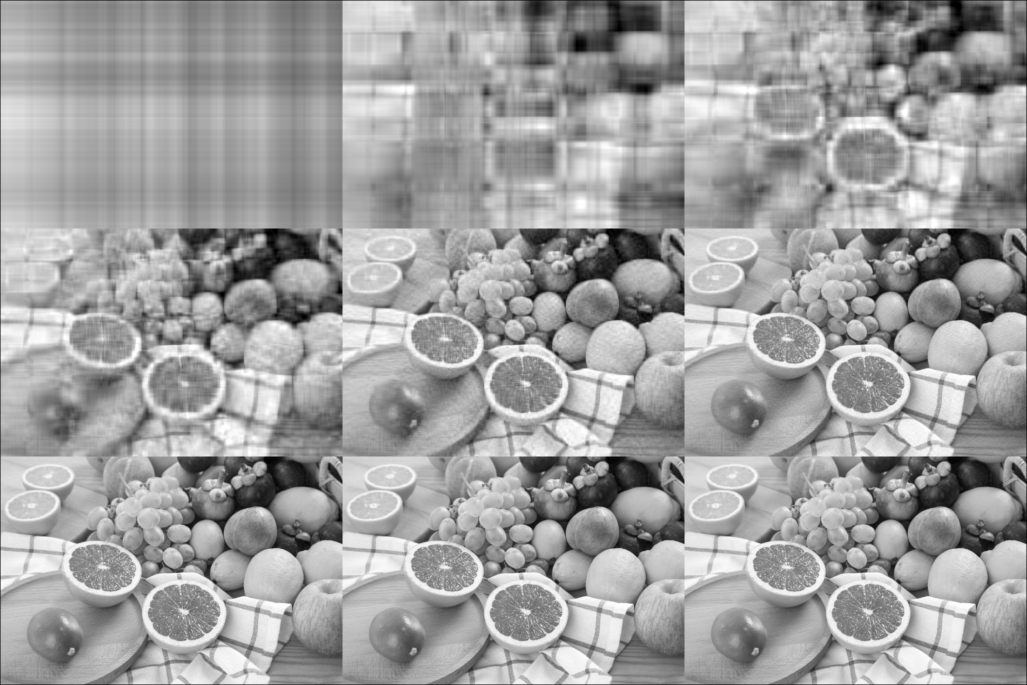

In [4]:
using ImageView, Images

img = load("fruit.jpg")
U, S, V = svd(Gray.(img))
S = diagm(S)
#store 9 images with different number of singular values
X = []
for k in [1, 5, 10, 20, 50, 100, 200, 400, 600]
    push!(X, Gray.(U[:,1:k] * S[1:k,1:k] * V'[1:k,:]))
end

vcat(hcat(X[1:3]...), hcat(X[4:6]...), hcat(X[7:end]...))

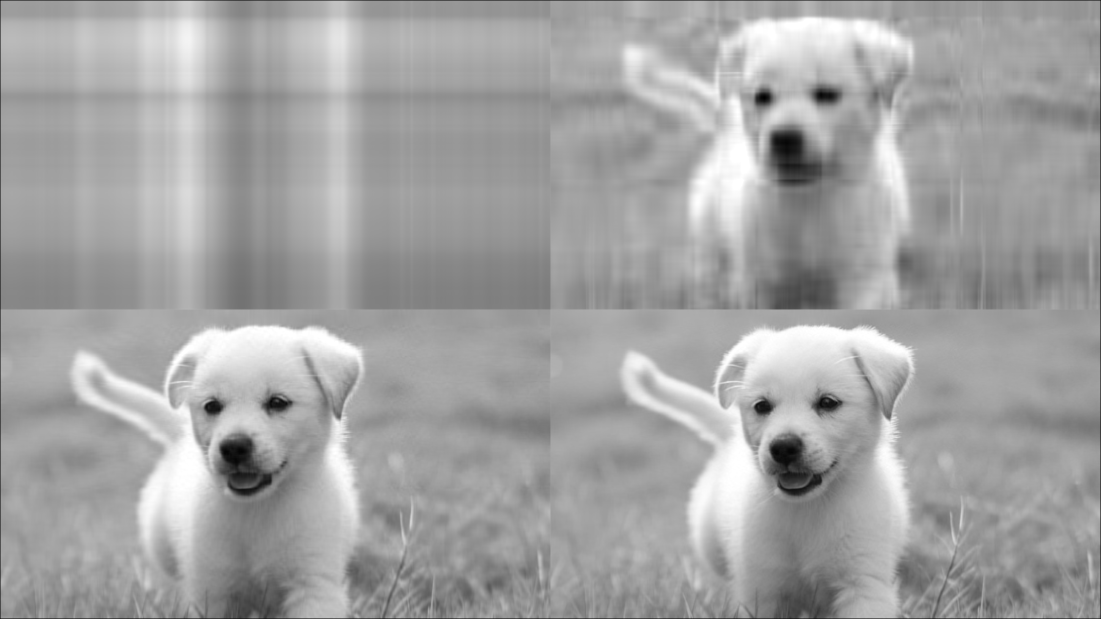

In [3]:
im = load("puppy.jpg")
U, S, V = svd(Gray.(im))
S = diagm(S)
#store 4 images with different number of singular values
X = []
for k in [1, 10, 50, 100]
    push!(X, Gray.(U[:,1:k] * S[1:k,1:k] * V'[1:k,:]))
end
vcat(hcat(X[1:2]...), hcat(X[3:4]...))

Here are the original images. We rebuild the image with the first $k$ singular values and their corresponding vectors. For the fruit image, we try 9 different values of $k$, and for the puppy image, we use 4 different values of $k$. We can see that if $k$ is too small (like $k = 1,5$ for the fruit image), the images are blurry, and we can hardly tell if the images are fruit. As the value of $k$ increases, the differences between the original images and compressed images are smaller. For example, for $k = 50$, although both the fruit image and puppy image seems a little distorted compared to their original images, their size is less than 10% of the original one, and they can also show the details well.

<img src="fastcore_imgs/fruit.jpg" width="300" /> <img src="fastcore_imgs/gray_image.jpg" width="300" />
<img src="fastcore_imgs/puppy.jpg" width="300" /> <img src="fastcore_imgs/gray_puppy.jpg" width="300" />

Take the "fruit" image as an example. We can see the singular value distribution curve below. The singular values decay with index rapidly, and the first 5% of singular values basically restore the general characteristics of the original image. In this way, using SVD transformation with first $k$ singular values may offer significant savings in storage over storing the whole matrix. Besides, the quality of the compressed image is pretty good. The right plot shows the relationship between compression ratio and the number of singular values we use. Compression ratio can be calculated as:
$$R = \frac{mn}{k(m+1+n)}$$
It decreases as the number of the singular values we use increases.

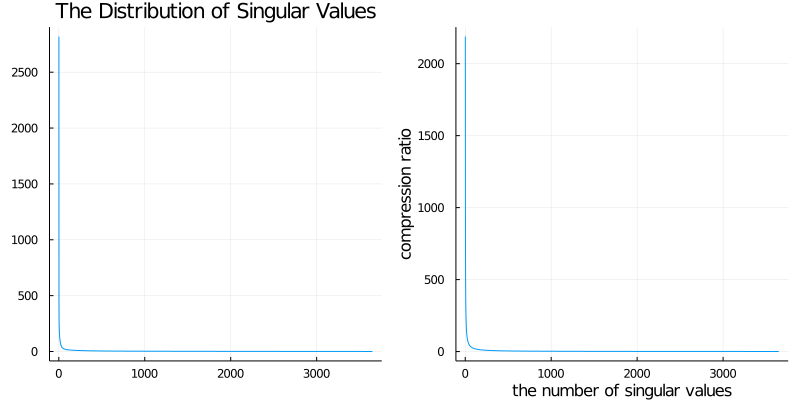

In [7]:
using Plots
n = length(diag(S))
p1 = plot(1:n, x -> diag(S)[x], title = "The Distribution of Singular Values", legend = false)

ratio(k) = (size(U,1) * size(V',2)) / (k*(size(U,1) + size(V',2) + 1))
p2 = plot(1:n, x -> ratio(x), xlabel = "the number of singular values", 
    ylabel = "compression ratio", legend = false)
plot(p1, p2, size = (800, 400))

The table below shows the summary of the results of storage space, compression ratio, and the mean square error for the compressed fruit image. Mean square error is measured as:
$$\text{MSE} = \frac{1}{mn} \sum_{x=1}^{m} \sum_{y=1}^{n} (I_1(x,y) - I_2(x,y))^2$$
where $I_1(x,y)$ is the original image matrix, $I_2(x,y)$ is the compressed image matrix, and $m,n$ is the dimensions of the image. A lower value for MSE means less error and higher quality of the image. Based on the results, we can see that using less singular values $(k)$, the better compression ratio can be achieved. Besides, the more singular values $(k)$ is used, the smaller MSE is, which means we have a better image quality. If the differences between the compressed image and the original one are smaller, more storage space will be used. We need to balance these parameters. Since the grayscale image matrix is in $[0,1]^{mn}$, the value of the mean square error is not that large. However, corresponding to the images above, we can still find that the acceptable image quality is about $0.003$ with $k = 50$, and the compression ratio is $\mathbf{R} = 43.77$. Additionally, the compressed image is pretty close to the original one, when $k = 100$, with $\mathbf{R} = 21.89$, and $\text{MSE} = 0.002$.

$$
\begin{aligned}
&\text { Table: Summary of the Result for Fruit Image Compression}\\
&\begin{array}{llcc}
\text { k } & \begin{array}{l}
\text { Storage Space}\\
\text {(bytes)}
\end{array} & \begin{array}{l}
\text { Compression ratio } \\
(\mathbf{R})
\end{array} & \begin{array}{l}
\text { MSE } \\
\text{(quality)}\\
\end{array}\\
\hline 1 & 616,788 & 2188.56 & 0.037 \\
5 & 951,351  & 437.71 & 0.017 \\
10 & 1,202,692 & 218.86 & 0.010 \\
20 & 1,455,527 & 109.43 & 0.006 \\
50 & 1,884,540 & 43.77 & 0.003 \\
100 & 2,425,504 & 21.89 & 0.002\\
200 & 3,010,958  & 10.94 & 0.001\\
400 & 3,586,171 & 5.47 &  6.8 \times 10^{-4}\\
600 & 3,961,152 & 3.64 & 4.4 \times 10^{-4}\\
\text{original} & 5,172,561 & * & 0
\end{array}
\end{aligned}
$$

### Image Reconstruction

Another important application of SVD in image processing is image reconstruction. It involves the selection of a certain basis vector for image matrices so that the image can exhibit various useful characteristics under this group of basis. Our principal approach is principal components analysis (PCA). PCA is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest$^{[5]}$. One more significant application of PCA is dimension reduction. Based on SVD, it linearly projects the original data to a lower dimensional subspace. Here we will use these ideas to reconstruct the images in a face dataset.

Here we use 100 face images from 10 people, and each image is $58 \times 48$ pixels. We show the images below:

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,

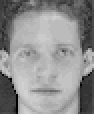
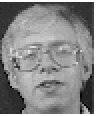
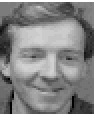
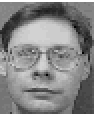
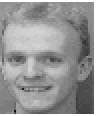
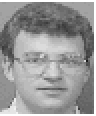
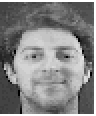
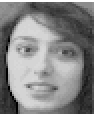
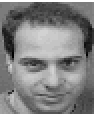
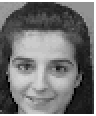
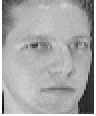
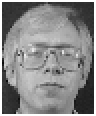
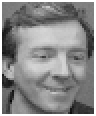
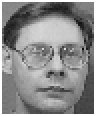
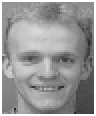
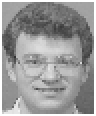
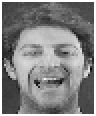
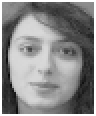
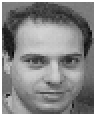
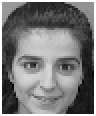
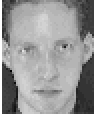
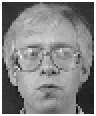
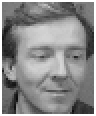
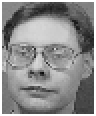
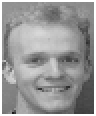
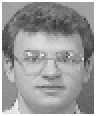
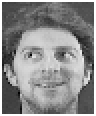
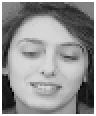
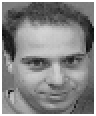
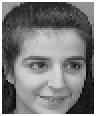
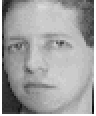
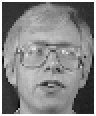
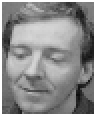
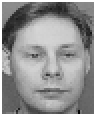
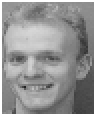
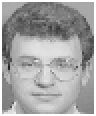
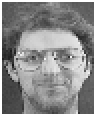
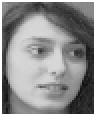
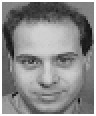
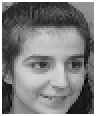
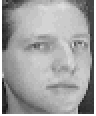
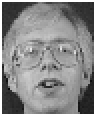
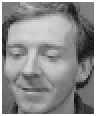
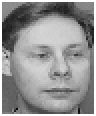
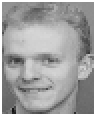
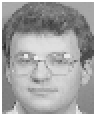
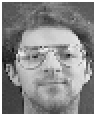
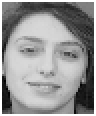
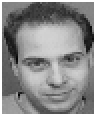
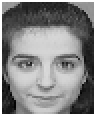
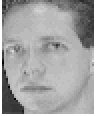
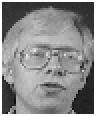
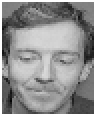
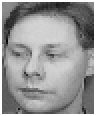
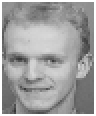
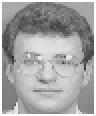
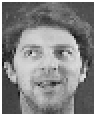
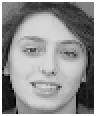
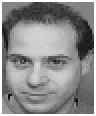
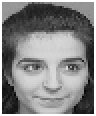
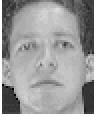
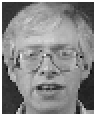
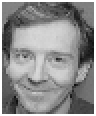
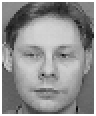
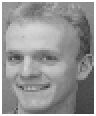
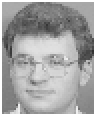
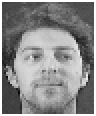
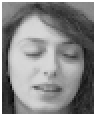
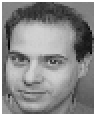
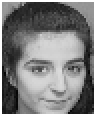
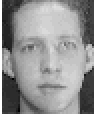
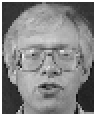
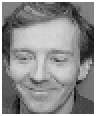
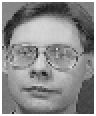
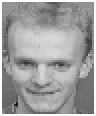
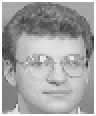
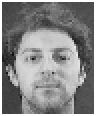
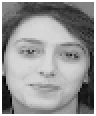
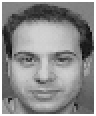
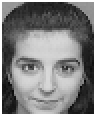
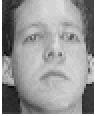
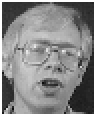
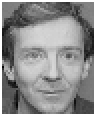
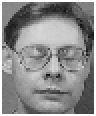
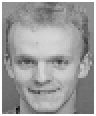
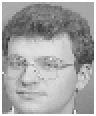
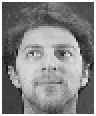
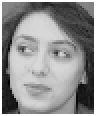
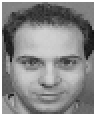
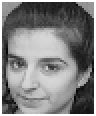
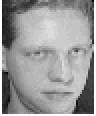
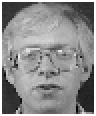
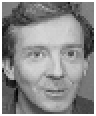
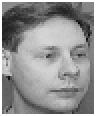
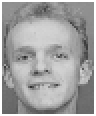
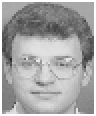
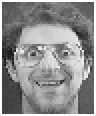
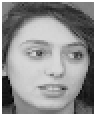
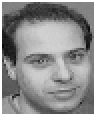
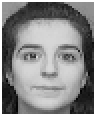

In [8]:
using Images, ImageView

X = []
for i in 1:100
    img = load("face" * string(i) * ".gif")
    push!(X, Gray.(img))
end

hcat([[X[i] for i in (10(j-1)+1):10j] for j in 1:10]...)

Next, we use PCA to the 100 images. $X$ stores the 100 images. We reshape each image into a 2784 $(58 \times 48)$ dimensional row vector, and store each vector in $X_{new}$. Then we get the mean of the matrix $X_{new}$, and substract it from the matrix to center the data at the origin. Besides, we apply SVD on the centered matrix to get the principal components. The mean face image shows below, which represents the mean features of the 100 faces. Subtracting the mean face vector also helps to find the features, which make the individuals different than the others, and maximize variance$^{[6]}$.

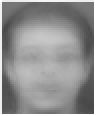

In [9]:
X_new = vcat([reshape(X[i], (1,2784)) for i in 1:100]...)
X_center = X_new .- mean(X_new, dims = 1)
U, S, V = svd(X_center)

Gray.(reshape(mean(X_new, dims = 1),(58,48)))

The principal components are also called eigenfaces. Then we reshape the eigenfaces to images with the first $k$ column vectors of $V$. The images of the first 10 eigenfaces are combined below.
(These images are taken from screenshots in the ImageView window after using the imshow function. Real images should not have a gray border). We can still see that these are human faces, but a little creepy. To reconstruct the original images, we use the eigenfaces. Each face is a weighted combination of those eigenfaces. We dot multiply the centered matrix and the eigenfaces (here $k = 50$), then we weight eigenfaces which gives the centered face and add it up to the mean face again$^{[6]}$. Finally, we get the reconstructed images. Compared to the original faces, the images below looks good, which retain most details. Besides, we also reduce the dimensionality of the images from $100\times 58\times 48$ to $50 \times 58\times48$. If we increase the principal components we use, the differences between the reconstructed images and the original ones will be smaller.

<img src="fastcore_imgs/eigen1.png" /><img src="fastcore_imgs/eigen2.png" /><img src="fastcore_imgs/eigen3.png" /><img src="fastcore_imgs/eigen4.png" /><img src="fastcore_imgs/eigen5.png" /> <br>
<img src="fastcore_imgs/eigen6.png" /><img src="fastcore_imgs/eigen7.png" /><img src="fastcore_imgs/eigen8.png" /><img src="fastcore_imgs/eigen9.png" /><img src="fastcore_imgs/eigen10.png" /> 

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,

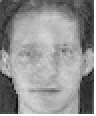
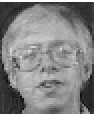
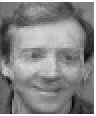
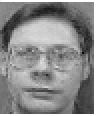
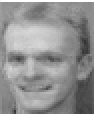
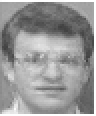
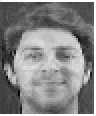
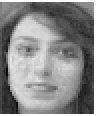
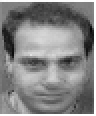
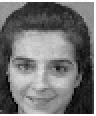
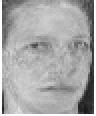
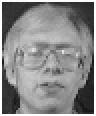
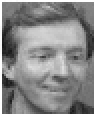
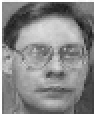
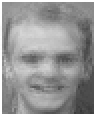
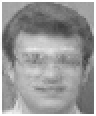
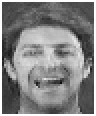
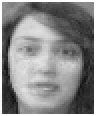
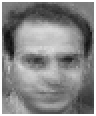
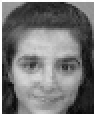
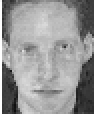
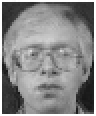
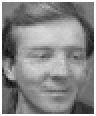
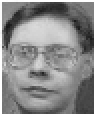
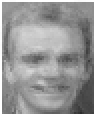
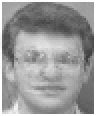
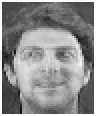
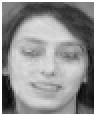
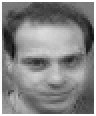
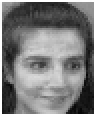
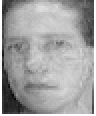
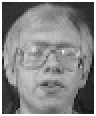
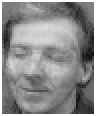
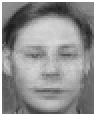
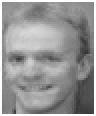
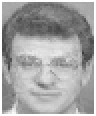
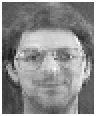
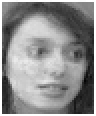
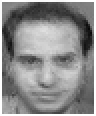
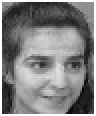
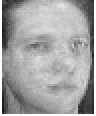
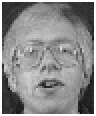
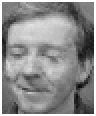
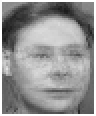
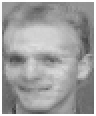
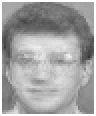
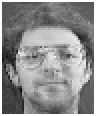
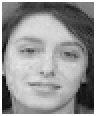
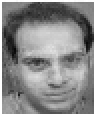
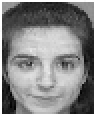
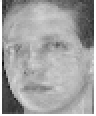
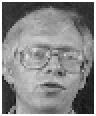
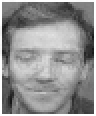
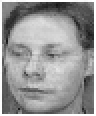
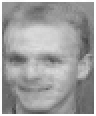
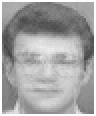
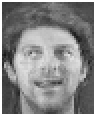
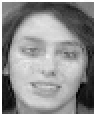
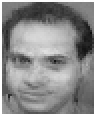
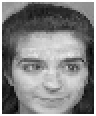
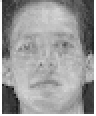
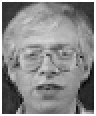
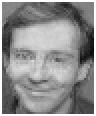
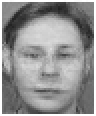
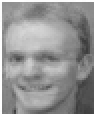
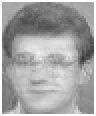
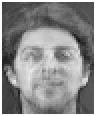
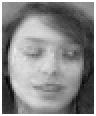
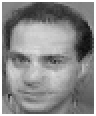
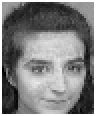
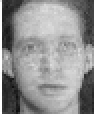
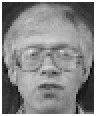
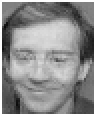
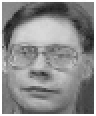
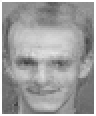
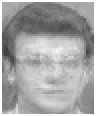
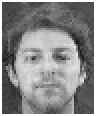
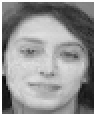
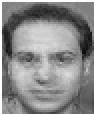
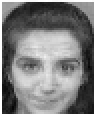
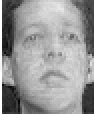
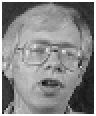
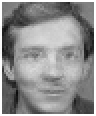
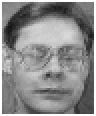
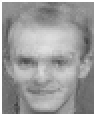
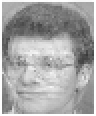
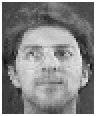
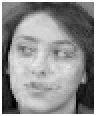
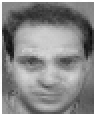
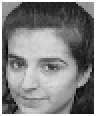
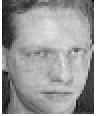
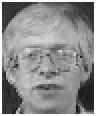
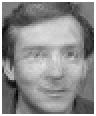
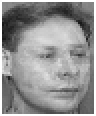
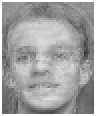
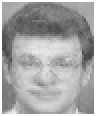
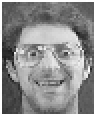
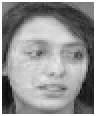
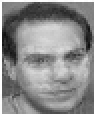
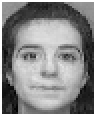

In [11]:
k = 50
weight = X_center * V[:,1:k]
recon_X = weight * V[:,1:k]' .+ mean(X_new, dims = 1)
hcat([[reshape(recon_X[i,:], (58,48)) for i in (10(j-1)+1):10j] for j in 1:10]...)

### Conclusion

In this article, we explain the geometric meaning of SVD, and explore the applications of SVD in image processing: image denoising, image compression and image reconstruction. We found that SVD is a reliable and efficient method to show the characteristics of a matrix. With SVD, we can reduce the noise of images by changing the unimportant singular values to zero, and compress images by discarding some singular values, while still maintaining a good quality of images. Besides, using PCA with SVD is conducive to reducing dimensions and reconstructing the images. In real world, these applications of SVD will contribute to reducing pressure on storage capacity of the memory, and extracting important features which can be used in other fields.

### References

[1] Watson, S., Singular Value Decomposition, <i>Data Gymnasia</i>, https://mathigon.org/course/linear-algebra/singular-value-decomposition, Accessed 11-11-20 <br>
[2] Digital Image Processing, https://sisu.ut.ee/imageprocessing/book/1, Accessed 11-11-20 <br>
[3] Wikipedia, Image noise, https://en.wikipedia.org/wiki/Image_noise, Accessed 11-12-20 <br>
[4] Mathews, B., Image Compression using Singular Value Decomposition (SVD), 12-12-14, http://www.math.utah.edu/~goller/F15_M2270/BradyMathews_SVDImage.pdf, Accessed 11-15-20 <br>
[5] Wikipedia, Principal component analysis, https://en.wikipedia.org/wiki/Principal_component_analysis, Accessed 11-15-20<br>
[6] Acar, N., Eigenfaces: Recovering Humans from Ghosts, https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184, Accessed 11-16-20